<a href="https://colab.research.google.com/github/pankaj-beldar/patent-data-NLP-classification/blob/main/dendogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
X = pd.read_csv('/content/transformed_data.csv')
X

,Principal Component 1,Principal Component 2
0,-21.615439,3.791762
1,-10.257136,-8.897680
2,76.789586,50.674933
3,-19.747907,-4.547233
4,-16.638254,-3.970360
...,...,...
35201,77.153777,-11.972643
35202,29.586639,1.716125
35203,-17.077025,0.133703
35204,-20.047662,0.544990


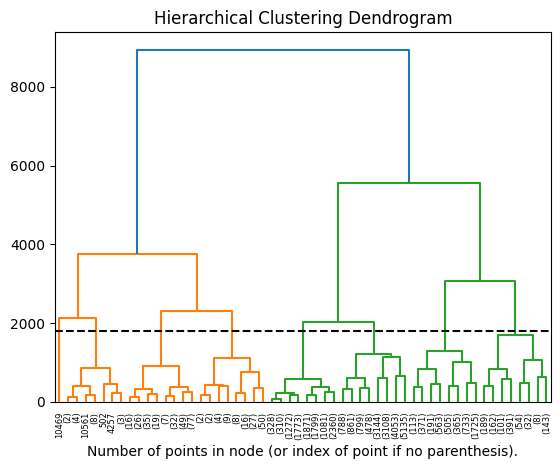

In [ ]:




from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)





# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y= 1800, color='black', linestyle='--')
plt.show()